In [1]:
#NyaupaneGanesh_BahraniJuhi_HW2
#To convert Earthquake data into a time-series data set.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the dataset Task 1
df_first = pd.read_csv("EarthquakeData - 20220109.csv", usecols= [1,9])

In [3]:
#Clean dataset and extract country from the dataset   
df_first[['Country','a','b','c','d','e']]=df_first['Location Name'].str.split(':|;|-', expand=True)
df_first=df_first.drop(['a', 'b','c','d','e','Location Name'], axis=1)
df_Top_five = df_first.groupby(["Country"]).size().sort_values(ascending=False).reset_index()
df_Top_five = df_Top_five.rename(columns={0: 'Count'})
df_Top_five = df_Top_five.head(5)
#Task 2 (5 countries which had the most earthquakes in descending order)
df_Top_five

,Country,Count
0,CHINA,609
1,INDONESIA,385
2,IRAN,384
3,JAPAN,347
4,ITALY,326


In [4]:
df_Top_five = pd.DataFrame(df_Top_five)

In [5]:
#Creating Empty dataFrame Start of Task 3
df4 = pd.DataFrame(columns=['Year',df_Top_five.iat[0,0],df_Top_five.iat[1,0],df_Top_five.iat[2,0],df_Top_five.iat[3,0],df_Top_five.iat[4,0]])

In [6]:
#Implementing control-break logic
start=1500
yearid=1
while start<=2022:    
    df4.at[yearid,'Year']=start
    for inda in df_Top_five.index:
        count=0
        for ind in df_first.index:
            if df_first.iat[ind,0]>=start  and df_first.iat[ind,0]<=start+25 and df_first.iat[ind,1] == df_Top_five.iat[inda,0]:
                count = count+1
        df4.at[yearid, df_Top_five.iat[inda,0]]=count
    start=start+25
    yearid=yearid+1

In [7]:
#Task 3 Output Table years,countries and their count
df4

,Year,CHINA,INDONESIA,IRAN,JAPAN,ITALY
1,1500,13,0,0,2,2
2,1525,5,0,3,1,4
3,1550,10,0,3,0,4
4,1575,6,0,1,3,1
5,1600,10,0,3,9,3
6,1625,13,3,5,6,11
7,1650,7,7,8,5,6
8,1675,7,1,5,7,7
9,1700,11,4,3,8,5
10,1725,12,0,1,5,7


In [8]:
#converting dataframe values to integer
df4["Year"] = df4["Year"].astype(str).astype(int)
df4["CHINA"] = df4["CHINA"].astype(str).astype(int)
df4["INDONESIA"] = df4["INDONESIA"].astype(str).astype(int)
df4["IRAN"] = df4["IRAN"].astype(str).astype(int)
df4["JAPAN"] = df4["JAPAN"].astype(str).astype(int)
df4["ITALY"] = df4["ITALY"].astype(str).astype(int)

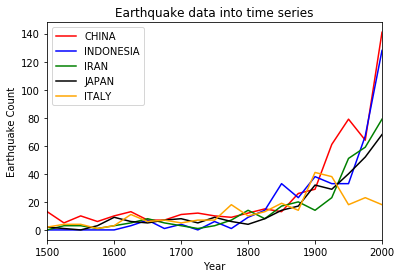

In [9]:
#Plotting of the chart
ax = plt.gca()
df4.plot(kind='line',x='Year',y='CHINA',color='red',ax=ax)
df4.plot(kind='line',x='Year',y='INDONESIA',color='blue',ax=ax)
df4.plot(kind='line',x='Year',y='IRAN',color='green',ax=ax)
df4.plot(kind='line',x='Year',y='JAPAN',color='black',ax=ax)
df4.plot(kind='line',x='Year',y='ITALY',color='orange',ax=ax)
ax.set(title='Earthquake data into time series', ylabel='Earthquake Count', xlabel='Year')
ax.legend(loc='best')
# showing the plot Task 4
plt.show()
